In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
def periodic_func(y0, a, b, c, t):
    return y0 + a * np.cos(t) + b * np.cos(4 * t) + c * np.cos(16 * t)
#     return y0 + a * np.cos(t)

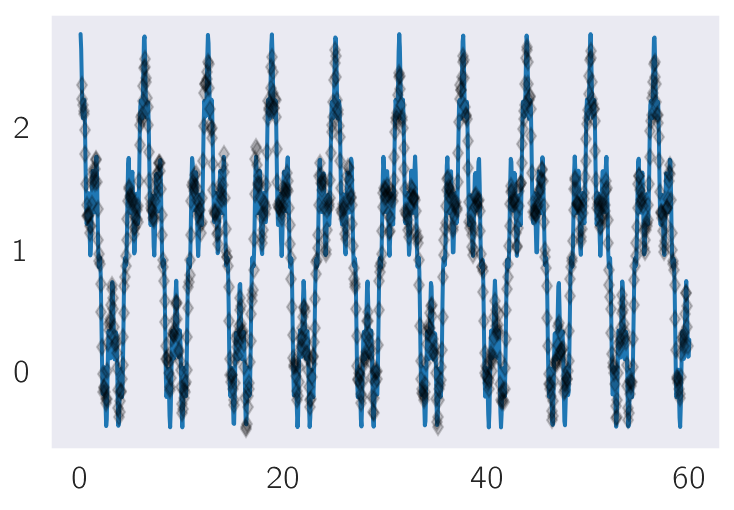

In [20]:
t = np.linspace(0, 60, 1000)
y = periodic_func(1, 1, .5, .25, t)
randn = np.random.normal(0, .2, len(t))

df = pd.DataFrame([t, y, y + randn]).transpose()
df.columns = ['time', 'Y', 'Data']
df['Smooth'] = df.Data.rolling(window=5, win_type='gaussian', center=True).mean(std=2)

plt.plot(t, y)
# plt.plot(df.time, df.Data, 'o', alpha=0.2)
plt.plot(df.time, df.Smooth, 'd', alpha=0.2, color='black')

115.25158592774835


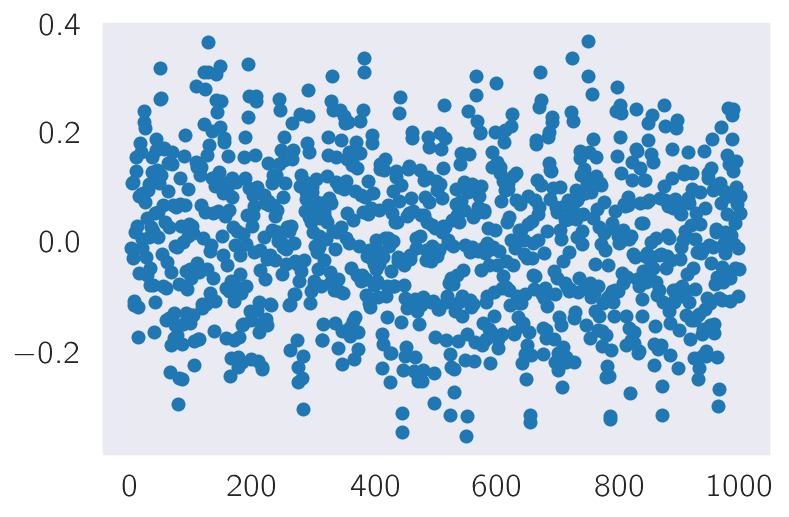

In [21]:
plt.plot(df.Smooth - df.Y, 'o')
print(np.abs(df.Smooth - df.Y).sum())

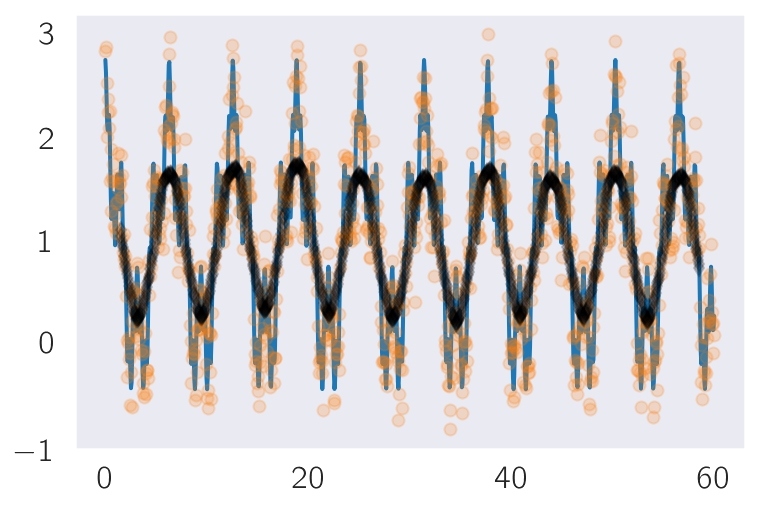

In [92]:
t = np.linspace(0, 60, 1000)
y = periodic_func(1, 1, .5, .25, t)
randn = np.random.normal(0, .2, len(t))

df = pd.DataFrame([t, y, y + randn]).transpose()
df.columns = ['time', 'Y', 'Data']
df['Smooth'] = df.Data.rolling(window=50, win_type='kaiser', center=True).mean(beta=1)

plt.plot(t, y)
plt.plot(df.time, df.Data, 'o', alpha=0.2)
plt.plot(df.time, df.Smooth, 'd', alpha=0.2, color='black')

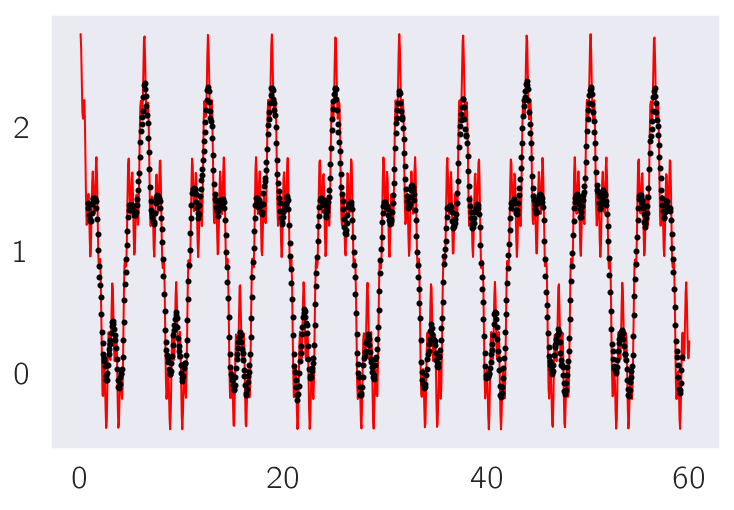

In [145]:
t = np.linspace(0, 60, 1000)
y = periodic_func(1, 1, .5, .25, t)
randn = np.random.normal(0, .2, len(t))

df = pd.DataFrame([t, y, y + randn]).transpose()
df.columns = ['time', 'Y', 'Data']
df['Smooth'] = df.Data.rolling(window=25, win_type='exponential', center=True).mean(tau=3)

plt.plot(t, y, lw=1, color='red')
# plt.plot(df.time, df.Data, 'o', alpha=0.2)
plt.plot(df.time, df.Smooth, 'o', color='black', ms=2)

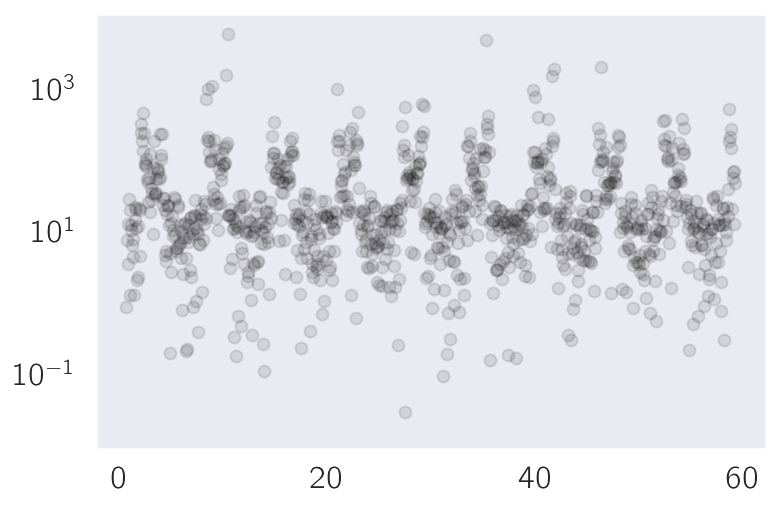

In [156]:
plt.scatter(df.time, 100 * np.abs(df.Smooth - df.Y) / np.abs(df.Y),
            color='black', alpha=0.1)
plt.yscale('log')

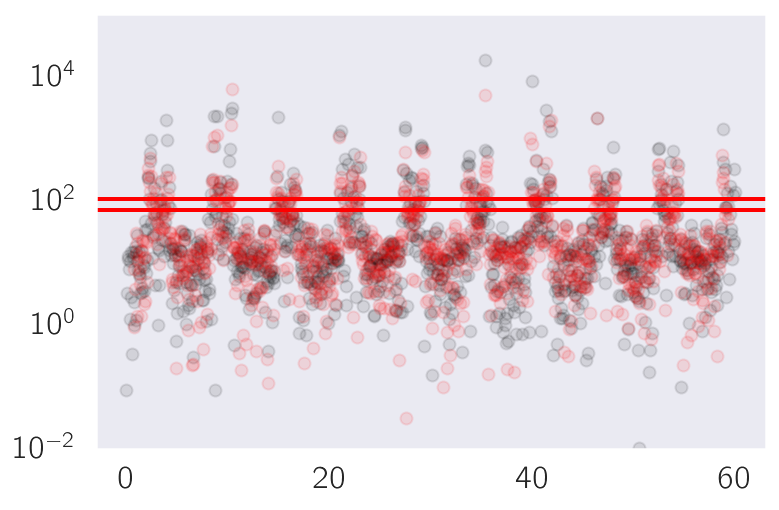

In [168]:
plt.scatter(df.time, 100 * np.abs(df.Data - df.Y) / np.abs(df.Y),
            color='black', alpha=0.1)
plt.scatter(df.time, 100 * np.abs(df.Smooth - df.Y) / np.abs(df.Y),
            color='red', alpha=0.1)
plt.axhline(np.mean(100 * np.abs(df.Data - df.Y) / np.abs(df.Y)),
            color='')
plt.axhline(np.mean(100 * np.abs(df.Smooth - df.Y) / np.abs(df.Y)),
            color='red')
plt.ylim(10 ** -2, 10 ** 5)
plt.yscale('log')